In [611]:
import numpy as np #operaciones matriciales y con vectores
import pandas as pd #tratamiento de datos
import matplotlib.pyplot as plt #gráficos
from sklearn import tree, datasets, metrics
from sklearn.metrics import precision_score
from sklearn import neighbors, metrics
from matplotlib.colors import ListedColormap
from sklearn import preprocessing
import matplotlib.patches as mpatches
#from sklearn import neighbors, datasets, metrics
from sklearn.model_selection import train_test_split #metodo de particionamiento de datasets para evaluación
from sklearn.model_selection import cross_val_score, cross_validate #método para evaluar varios particionamientos de C-V
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedKFold, LeaveOneOut #Iteradores de C-V
import seaborn as sns
import math
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import Image  
from sklearn.externals.six import StringIO  


from sklearn.neural_network import MLPClassifier
import time
from sklearn.metrics import make_scorer 
from sklearn.metrics import accuracy_score, cohen_kappa_score, classification_report
from sklearn.model_selection import GridSearchCV


warnings.filterwarnings("ignore")

In [612]:
data = pd.read_csv('PF-02-DatosTelco.csv', sep=',')
print(data.shape)
data.head(5)

(23162, 9)


,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
0,VINCULADO,4074840,8.830000e+08,1444153.0,26,2.3,11.167542,20.3,1.762872
1,VINCULADO,8574088,1.745000e+09,2157661.0,23,3.7,0.000000,53.5,3.361266
2,RETIRADO,795993,9.500000e+07,452809.0,38,16.8,350.610224,13.9,8.359438
3,RETIRADO,8115015,8.300000e+07,2617184.0,37,17.6,230.913888,45.7,8.964017
4,RETIRADO,8187499,6.770000e+08,666069.0,19,0.0,131.541983,67.2,8.808206


In [613]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23162 entries, 0 to 23161
Data columns (total 9 columns):
ESTADO                23162 non-null object
INGRESOS              23162 non-null int64
CASA                  23162 non-null float64
PRECIO_DISPOSITIVO    23162 non-null float64
MESES                 23162 non-null int64
DURACION              23162 non-null float64
SOBRECARGO            23162 non-null float64
SALDO_RESTANTE        23162 non-null float64
SATISFACCION          23162 non-null float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.6+ MB


In [614]:
data.describe(include="all")

,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
count,23162,2.316200e+04,2.316200e+04,2.316200e+04,23162.000000,23162.000000,23162.000000,23162.000000,23162.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,RETIRADO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,11665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.813115e+06,7.161435e+08,1.315340e+06,24.197133,9.609852,110.056296,42.991888,5.480840
std,NaN,2.737374e+06,4.811551e+08,7.485700e+05,14.264014,7.040007,100.771503,30.204540,2.809938
min,NaN,1.500000e+05,8.000000e+07,2.000000e+05,0.000000,0.000000,0.000000,0.000000,0.613580
25%,NaN,2.156296e+06,3.570000e+08,6.571840e+05,14.000000,2.100000,12.566883,15.200000,2.705504
50%,NaN,6.137553e+06,6.240000e+08,1.237456e+06,24.000000,14.600000,75.383640,37.650000,4.064550
75%,NaN,7.347180e+06,9.077500e+08,1.829581e+06,34.000000,16.100000,201.550049,70.000000,8.268244


# Busco valores duplicados

In [615]:
data[data.duplicated()]

,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION


# Buscamos valores nulos

In [616]:
data.isnull().values.any()

False

# Revisamos qu elos datos esten completos

In [617]:
data.count()

ESTADO                23162
INGRESOS              23162
CASA                  23162
PRECIO_DISPOSITIVO    23162
MESES                 23162
DURACION              23162
SOBRECARGO            23162
SALDO_RESTANTE        23162
SATISFACCION          23162
dtype: int64

# Buscamos valores atipicos en INGRESOS

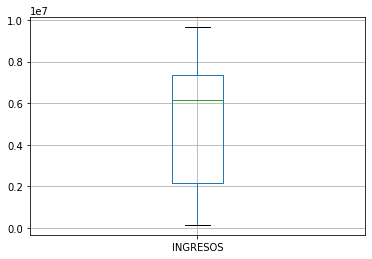

In [618]:
data.boxplot(column=['INGRESOS'])

# Buscamos valores atipicos en CASA

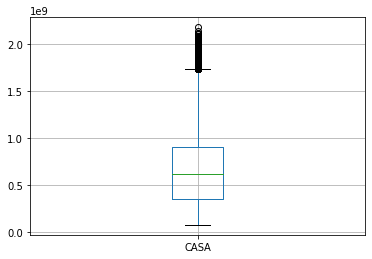

In [619]:
data.boxplot(column=['CASA'])

## Segun este boxPlot hay una gran cantidad de datos atipicos en la variable CASA

# Buscamos valores atipicos en PRECIO_DISPOSITIVO	

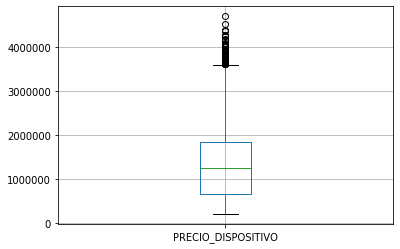

In [620]:
data.boxplot(column=['PRECIO_DISPOSITIVO'])

## Segun este boxPlot hay una gran cantidad de datos atipicos en la variable PRECIO_DISPOSITIVO

# Buscamos valores atipicos en MESES	

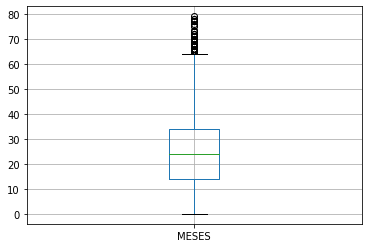

In [621]:
data.boxplot(column=['MESES'])

## Segun este boxPlot hay una gran cantidad de datos atipicos en la variable MESES

# Buscamos valores atipicos en DURACION

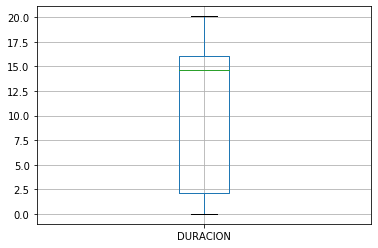

In [622]:
data.boxplot(column=['DURACION'])

# Buscamos valores atipicos en SOBRECARGO

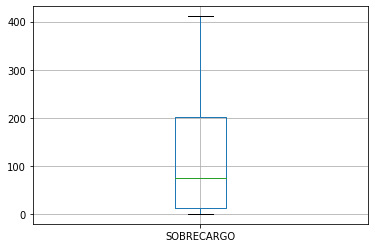

In [623]:
data.boxplot(column=['SOBRECARGO'])

# Buscamos valores atipicos en SALDO_RESTANTE

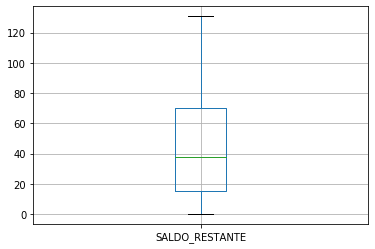

In [624]:
data.boxplot(column=['SALDO_RESTANTE'])

# Buscamos valores atipicos en SATISFACCION

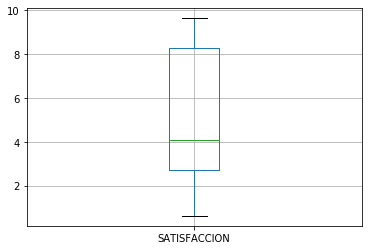

In [625]:
data.boxplot(column=['SATISFACCION'])

________________

________________

________________

# Solucion de inconsistencias en los datos


In [626]:
deletedData=data.copy()

In [627]:
print("Antes: "+str(data.shape))
def drop_numerical_outliers(data, minq=0.01,maxq=0.99):
    # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
    constrains = data.select_dtypes(include=[np.number]) \
        .apply(lambda x: x.between(x.quantile(minq), x.quantile(maxq))) \
        .all(axis=1)
    # Drop (inplace) values set to be rejected
    data.drop(data.index[~constrains], inplace=True)
drop_numerical_outliers(data)
data
print("Despues: "+str(data.shape))

Antes: (23162, 9)
Despues: (20953, 9)


In [628]:
print("Antes: "+str(deletedData.shape))
def drop_numerical_outliers1(deletedData, minq=0.01,maxq=0.99):
    # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
    constrains = deletedData.select_dtypes(include=[np.number]) \
        .apply(lambda x: x.between(x.quantile(minq), x.quantile(maxq))) \
        .all(axis=1)
    # Drop (inplace) values set to be rejected
    deletedData.drop(deletedData.index[constrains], inplace=True)
drop_numerical_outliers1(deletedData)
deletedData
print("Despues: "+str(deletedData.shape))

Antes: (23162, 9)
Despues: (2209, 9)


## Aqui estan los datos atipicos encontrados y separados de dataFrame original

In [629]:
deletedData

,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
1,VINCULADO,8574088,1.745000e+09,2157661.0,23,3.7,0.000000,53.5,3.361266
2,RETIRADO,795993,9.500000e+07,452809.0,38,16.8,350.610224,13.9,8.359438
6,RETIRADO,7256758,7.120000e+08,3493707.0,20,14.8,217.322554,69.5,8.285137
29,RETIRADO,1409067,1.105000e+09,644429.0,55,16.6,188.592668,5.8,9.027948
31,VINCULADO,7320612,1.548000e+09,284060.0,38,18.2,31.606283,92.6,2.779810
44,RETIRADO,8763522,7.940000e+08,902864.0,15,15.0,21.277878,56.6,3.330574
45,RETIRADO,4036032,5.080000e+08,2750512.0,27,2.5,224.352073,25.6,9.117037
82,VINCULADO,7319634,1.599000e+09,1259835.0,12,2.0,0.000000,72.7,1.208224
88,RETIRADO,7659140,8.540000e+08,2944507.0,37,18.4,287.722936,80.8,8.163270
100,RETIRADO,8691926,1.978000e+09,1100248.0,10,15.1,259.381896,51.1,8.289950


# 3 Tipos de modelos

# Protocolo de evalucaion HoldOut


## Vamos a utilizar el protocolo de evaluacion holdout con un 70% train y 30% test para los 3 modelos a evaluar.

Para este proyecto vamos a utilizar las metricas  de <b>Kappa global</b>, <b>Accuracy</b> y la <b>Precision</b> que nos permitiran determinar el mejor modelo a seguir. En este caso el <b>Kappa global</b> determinar el mejor modelo que se encuentre por encima del baseline. El <b>Accuracy</b> nos permitira ver la cantidad de predicciones positivas que fueron correctas. Por ultimo la <b>Precision</b> nos dara una vista del porcentaje de casos positivos detectados.

In [630]:
def transformar(n):
  if n=="VINCULADO" or n=="1" :
    return 1
  if n=="RETIRADO" or n=="0":
    return 0
  return n

In [631]:
def transformar2(n):
  if n=="VINCULADO" or n=="1" :
    return 1
  if n=="RETIRADO" or n=="0":
    return 0
  return n

In [632]:
data['ESTADO'] = data.applymap(transformar)['ESTADO']

In [633]:
data.head(5)

,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
0,1,4074840,883000000.0,1444153.0,26,2.3,11.167542,20.3,1.762872
3,0,8115015,83000000.0,2617184.0,37,17.6,230.913888,45.7,8.964017
4,0,8187499,677000000.0,666069.0,19,0.0,131.541983,67.2,8.808206
5,1,7250225,424000000.0,548116.0,19,2.2,0.000000,72.0,1.979549
7,0,3262245,684000000.0,985708.0,32,1.3,275.595131,19.0,8.040629


# BaseLine

In [634]:
data.head()

,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
0,1,4074840,883000000.0,1444153.0,26,2.3,11.167542,20.3,1.762872
3,0,8115015,83000000.0,2617184.0,37,17.6,230.913888,45.7,8.964017
4,0,8187499,677000000.0,666069.0,19,0.0,131.541983,67.2,8.808206
5,1,7250225,424000000.0,548116.0,19,2.2,0.000000,72.0,1.979549
7,0,3262245,684000000.0,985708.0,32,1.3,275.595131,19.0,8.040629


50.13601870853815

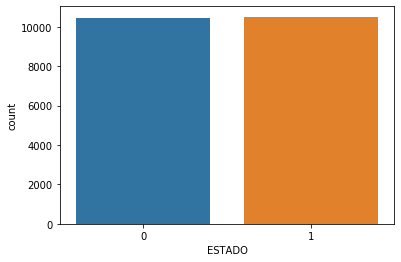

In [635]:
### Baseline
ax = sns.countplot(x="ESTADO", data=data)
data.ESTADO[data.ESTADO==1].aggregate('count') / data.shape[0] * 100

## La probabilidad de que el siguiente cliente sea vinculado, accuracy del baseLine 50.136018%

# Holdout del datset

In [636]:
data['ESTADO'] = data.applymap(transformar2)['ESTADO']

In [637]:
data.corr(method="pearson")

,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
ESTADO,1.000000,-0.002640,-0.000811,0.004680,0.005914,0.003026,-0.733850,-0.003172,-0.799079
INGRESOS,-0.002640,1.000000,0.376284,-0.002491,-0.007802,-0.162776,0.000992,0.849837,0.004364
CASA,-0.000811,0.376284,1.000000,0.001979,-0.000172,-0.063783,0.003193,0.324477,0.003523
PRECIO_DISPOSITIVO,0.004680,-0.002491,0.001979,1.000000,-0.004031,0.012935,0.000949,-0.000027,-0.002261
MESES,0.005914,-0.007802,-0.000172,-0.004031,1.000000,0.007726,0.002495,-0.007470,-0.000090
DURACION,0.003026,-0.162776,-0.063783,0.012935,0.007726,1.000000,-0.001173,0.047924,-0.001634
SOBRECARGO,-0.733850,0.000992,0.003193,0.000949,0.002495,-0.001173,1.000000,0.002620,0.897264
SALDO_RESTANTE,-0.003172,0.849837,0.324477,-0.000027,-0.007470,0.047924,0.002620,1.000000,0.004455
SATISFACCION,-0.799079,0.004364,0.003523,-0.002261,-0.000090,-0.001634,0.897264,0.004455,1.000000


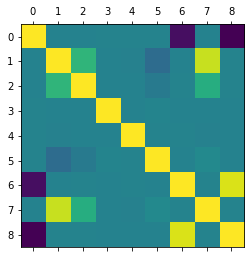

In [638]:
plt.matshow(data.corr())

Encontramos que la variable ESTADO esta fuertemente correlacionada con las variables SOBRECARGO y SATISFACCION.
Con respecto a PCA en el caso de que no fuera un aprendizaje no supervisado lo mas probable es que si hallamos los componentes principales encontraremos que las variables de SOBRECARGO y SATISFACCION. Ademas de que es probable es que esas dos variables sean las mas representativas para representar el ESTADO de un cliente.

In [639]:
data.head()

,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
0,1,4074840,883000000.0,1444153.0,26,2.3,11.167542,20.3,1.762872
3,0,8115015,83000000.0,2617184.0,37,17.6,230.913888,45.7,8.964017
4,0,8187499,677000000.0,666069.0,19,0.0,131.541983,67.2,8.808206
5,1,7250225,424000000.0,548116.0,19,2.2,0.000000,72.0,1.979549
7,0,3262245,684000000.0,985708.0,32,1.3,275.595131,19.0,8.040629


In [640]:
x=data[["SOBRECARGO","SATISFACCION"]].values
y=data[["ESTADO"]].values

In [641]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [642]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Modelo KNN

In [643]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Holdout

In [644]:
X_normalized = preprocessing.normalize(x, norm='l2')
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3,random_state=12345)

In [645]:
k_vec= np.arange(1,40,3)
k_vec

array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37])

In [646]:
error_test_vect = []
error_train_vect = []
kappa_train_vec=[]
kappa_test_vec=[]
acc_train_vec=[]
acc_test_vec=[]
Confusion_matrix_vect=[]
report_vect=[]

for k in k_vec:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_train)
    error_train_vect.append(metrics.precision_score(y_train, y_pred))
    acc_train_vec.append(metrics.accuracy_score(y_train, y_pred))
    kappa_train_vec.append(metrics.cohen_kappa_score(y_train, y_pred))
    
    
    
    
    y_pred = knn.predict(X_test)
    acc_test_vec.append(metrics.accuracy_score(y_test, y_pred))
    error_test_vect.append(metrics.precision_score(y_test, y_pred))
    kappa_test_vec.append(metrics.cohen_kappa_score(y_test, y_pred))
    print("------------------------------------------------------------------------")
    print(k)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("------------------------------------------------------------------------")

------------------------------------------------------------------------
1
[[2164  993]
 [ 854 2275]]
              precision    recall  f1-score   support

           0       0.72      0.69      0.70      3157
           1       0.70      0.73      0.71      3129

    accuracy                           0.71      6286
   macro avg       0.71      0.71      0.71      6286
weighted avg       0.71      0.71      0.71      6286

------------------------------------------------------------------------
------------------------------------------------------------------------
4
[[2638  519]
 [ 960 2169]]
              precision    recall  f1-score   support

           0       0.73      0.84      0.78      3157
           1       0.81      0.69      0.75      3129

    accuracy                           0.76      6286
   macro avg       0.77      0.76      0.76      6286
weighted avg       0.77      0.76      0.76      6286

---------------------------------------------------------------------

## Grafica Kappa vs complejidad del modelo K-NN

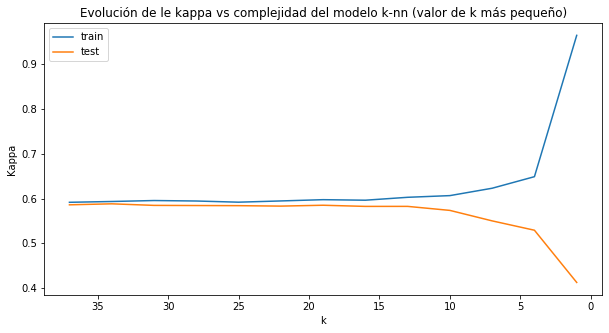

In [647]:
plt.figure(figsize=(10,5))
ax = plt.gca() # get current axis
plt.plot(k_vec, kappa_train_vec)
plt.plot(k_vec, kappa_test_vec)
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('k')
plt.ylabel('Kappa')
plt.title('Evolución de le kappa vs complejidad del modelo k-nn (valor de k más pequeño)')
plt.legend(['train', 'test'])

## Grafica exactitud vs complejidad del modelo K-NN

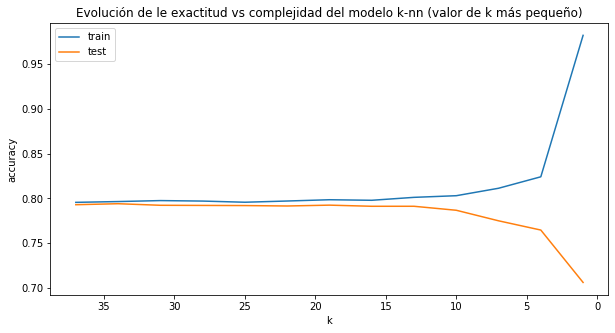

In [648]:
plt.figure(figsize=(10,5))
ax = plt.gca() # get current axis
plt.plot(k_vec, acc_train_vec)
plt.plot(k_vec, acc_test_vec)
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('Evolución de le exactitud vs complejidad del modelo k-nn (valor de k más pequeño)')
plt.legend(['train', 'test'])

## Grafica Precision vs complejidad del modelo K-NN

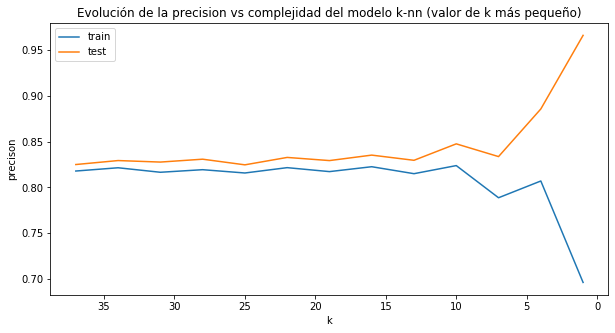

In [649]:
plt.figure(figsize=(10,5))
ax = plt.gca() # get current axis
plt.plot(k_vec, error_test_vect)
plt.plot(k_vec, error_train_vect)
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('k')
plt.ylabel('precison')
plt.title('Evolución de la precision vs complejidad del modelo k-nn (valor de k más pequeño)')
plt.legend(['train', 'test'])

# Modelo Arbol de decision

In [650]:
np.random.seed(1234)
ctree = tree.DecisionTreeClassifier(
    criterion='entropy', # el criterio de particionamiento de un conjunto de datos (gini, entropy)
    max_depth=8,      # prepoda: controla la profundidad del árbol (largo máximo de las ramas)
    min_samples_split=4, # prepoda: el mínimo número de registros necesarios para crear una nueva rama
    min_samples_leaf=2,  # prepoda: el mínimo número de registros en una hoja
    random_state=None,   # semilla del generador aleatorio utilizado para 
    max_leaf_nodes=2, # prepoda: máximo número de nodos hojas
    min_impurity_decrease=0.0, # prepoda: umbral mínimo de reducción de la impureza para aceptar la creación de una rama
    class_weight=None    # permite asociar pesos a las clases, en el caso de diferencias de importancia entre ellas
)

In [651]:
ctree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
                       max_features=None, max_leaf_nodes=2,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [652]:
ctree.feature_importances_

array([1., 0.])

Evaluacion del modelo

In [653]:
y_pred = ctree.predict(X_test)

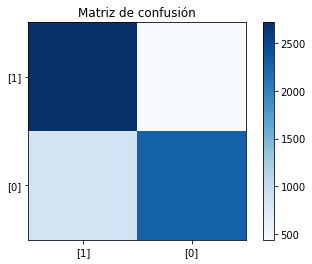

In [654]:
cm= metrics.confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Matriz de confusión")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, y_test)
plt.yticks(tick_marks, y_test)
plt.show()

In [655]:
print(cm)
print("Exactitud: ", metrics.accuracy_score(y_test, y_pred))
print("Kappa    : ", metrics.cohen_kappa_score(y_test, y_pred))
print("Precisión     : ", metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall        : ", metrics.recall_score(y_test, y_pred, average='macro'))
VN = np.sum(cm[1:3,1:3])
FP = np.sum(cm[0,1:3])
specificity = VN/(VN+FP)
print("Especificidad : ", specificity)
print("F1-score      : ", metrics.f1_score(y_test, y_pred, average='macro'))


[[2718  439]
 [ 851 2278]]
Exactitud:  0.7947820553611199
Kappa    :  0.5893161650790049
Precisión     :  0.7999912962529647
Recall        :  0.794486029057972
Especificidad :  0.8384247331615753
F1-score      :  0.7937716281983945


## Mejor arbol de decision

In [656]:
ctree = tree.DecisionTreeClassifier(
    criterion='entropy', # el criterio de particionamiento de un conjunto de datos (gini, entropy)
    max_depth=8,      # prepoda: controla la profundidad del árbol (largo máximo de las ramas)
    min_samples_split=4, # prepoda: el mínimo número de registros necesarios para crear una nueva rama
    min_samples_leaf=2,  # prepoda: el mínimo número de registros en una hoja
    random_state=None,   # semilla del generador aleatorio utilizado para 
    max_leaf_nodes=2, # prepoda: máximo número de nodos hojas
    min_impurity_decrease=0.0, # prepoda: umbral mínimo de reducción de la impureza para aceptar la creación de una rama
    class_weight=None    # permite asociar pesos a las clases, en el caso de diferencias de importancia entre ellas
)
criterion_vec = ['entropy', 'gini']
max_depth_vec = [2,4,8,16,32,64,128]
min_samples_split_vec = [4,6,8,12,16,20,24]
min_samples_leaf_vec = [2,4,6,8,10,12]
random_state_vec = [None]
max_leaf_nodes_vec = [2,4,6,8,10,12]
min_impurity_decrease_vec = [0.0001,0.001,0.01,0.4]
class_weight_vec=[None]


In [657]:
import time
start = time.time() # Devuelve el tiempo actual en segundos desde el 1o de enero de 1970 (punto de referencia)

np.random.seed(1234)
parametros = {'criterion': criterion_vec,
              'max_depth':max_depth_vec,
              'min_samples_split': min_samples_split_vec,
              'min_samples_leaf': min_samples_leaf_vec,
              'random_state': random_state_vec,
              'max_leaf_nodes': max_leaf_nodes_vec,
              'min_impurity_decrease': min_impurity_decrease_vec,
              'class_weight': class_weight_vec
              }
scoring = {'kappa':make_scorer(cohen_kappa_score), 'accuracy':'accuracy'}
grid = GridSearchCV(ctree, param_grid=parametros, cv=5, scoring=scoring, refit='accuracy', n_jobs=-1, iid=True)


In [658]:
grid.fit(X_train, y_train)

print("Los parámetros del mejor modelo fueron {0}, que permiten obtener un Accuracy de {1:.2f}% y un Kappa del {2:.2f}".format(
    grid.best_params_, grid.best_score_*100, grid.cv_results_['mean_test_kappa'][grid.best_index_]*100))
end = time.time() # Tiempo después de finalizar el entrenamiento del modelo
print("Tiempo total: {0:.2f} minutos".format((end-start)/60))


KeyboardInterrupt: 

In [ ]:

df = pd.DataFrame([(acc*100, kappa*100) for (acc, kappa) in 
                   zip( 
                       grid.cv_results_['mean_test_accuracy'], 
                       grid.cv_results_['mean_test_kappa'],
                      )
                   ], columns = ('Accuracy', 'Kappa'))


In [ ]:
df.iloc[np.argsort(-df.Accuracy),]

In [ ]:


df = pd.DataFrame([(cri,md,mss,msl,rs,mln,mid,cw,acc*100, kappa*100) for (cri,md,mss,msl,rs,mln,mid,cw,acc, kappa) in 
                   zip( 
                       grid.cv_results_['param_criterion'], 
                       grid.cv_results_['param_max_depth'], 
                       grid.cv_results_['param_min_samples_split'], 
                       grid.cv_results_['param_min_samples_leaf'], 
                       grid.cv_results_['param_random_state'], 
                       grid.cv_results_['param_max_leaf_nodes'],
                       grid.cv_results_['param_min_impurity_decrease'],
                       grid.cv_results_['param_class_weight'],
                       
                       grid.cv_results_['mean_test_accuracy'], 
                       grid.cv_results_['mean_test_kappa'],
                       
                      )
                   ], columns = ('Criterion','Max Depth','Min Samples split','Min Sample leaf','random state','max leaf nodes','min imp decrease','class weight','Accuracy', 'Kappa'))


In [ ]:
df.iloc[np.argsort(-df.Accuracy),].head(20)

# Red Neuronal

In [ ]:
X_normalized = preprocessing.normalize(x, norm='l2')
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3,random_state=12345)

In [ ]:
print(X_train.shape); print(X_test.shape)

In [ ]:
activation_vec = ['logistic', 'relu', 'tanh']
max_iter_vec = [10, 20, 50, 75, 100, 200, 300, 400, 500, 1000, 2000]
hidden_layer_sizes_vec = [(10,), (20,), (30,), (10, 10), (20, 20), (30, 30), (20, 10), (30, 20, 10)]
learning_rate_init_vec = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05]

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

# Mejor red neuronal

In [ ]:
activation_vec = ['logistic', 'relu', 'tanh']
max_iter_vec = [10, 20, 50, 75, 100, 200, 300, 400, 500, 1000, 2000]
hidden_layer_sizes_vec = [(10,), (20,), (30,), (10, 10), (20, 20), (30, 30), (20, 10), 
                          (10, 10, 10), (20, 20, 20), (30, 30, 30), (30, 20, 10)]
learning_rate_init_vec = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02]

In [ ]:
import time
start = time.time() # Devuelve el tiempo actual en segundos desde el 1o de enero de 1970 (punto de referencia)

np.random.seed(1234)
parametros = {'activation': activation_vec,
              'max_iter':max_iter_vec,
              'hidden_layer_sizes': hidden_layer_sizes_vec,
              'learning_rate_init': learning_rate_init_vec
              }
scoring = {'kappa':make_scorer(cohen_kappa_score), 'accuracy':'accuracy'}
grid = GridSearchCV(mlp, param_grid=parametros, cv=5, scoring=scoring, refit='accuracy', n_jobs=-1, iid=True)

# <font color="red"><b>No ejecutar este codigo, se demora mucho</b></font>

In [ ]:
grid.fit(X_train, y_train)

print("Los parámetros del mejor modelo fueron {0}, que permiten obtener un Accuracy de {1:.2f}% y un Kappa del {2:.2f}".format(
    grid.best_params_, grid.best_score_*100, grid.cv_results_['mean_test_kappa'][grid.best_index_]*100))
end = time.time() # Tiempo después de finalizar el entrenamiento del modelo
print("Tiempo total: {0:.2f} minutos".format((end-start)/60))

In [ ]:
df = pd.DataFrame([(acc*100, kappa*100) for (acc, kappa) in 
                   zip( 
                       grid.cv_results_['mean_test_accuracy'], 
                       grid.cv_results_['mean_test_kappa'],
                      )
                   ], columns = ('Accuracy', 'Kappa'))

In [ ]:
df.iloc[np.argsort(-df.Accuracy),]

In [ ]:
df = pd.DataFrame([(act, hidden_layers, lr, max_iter, acc*100, kappa*100) for (act, hidden_layers, lr, max_iter, acc, kappa) in 
                   zip(
                       grid.cv_results_['param_activation'], 
                       grid.cv_results_['param_hidden_layer_sizes'], 
                       grid.cv_results_['param_learning_rate_init'], 
                       grid.cv_results_['param_max_iter'], 
                       grid.cv_results_['mean_test_accuracy'], 
                       grid.cv_results_['mean_test_kappa'],
                      )
                   ], columns = ('Activation', 'HiddenLayers', 'LearningRate', 'MaxIter', 'Accuracy', 'Kappa'))

In [ ]:
df.iloc[np.argsort(-df.Accuracy),].head(20)

## La salida del codigo anterior fue :

Los parámetros del mejor modelo fueron {'activation': 'logistic', 'hidden_layer_sizes': (10, 10, 10), 'learning_rate_init': 0.003, 'max_iter': 200}, que permiten obtener un Accuracy de 79.47% y un Kappa del 58.94
Tiempo total: 121.08 minutos

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10),learning_rate_init=0.003, activation='logistic', solver='adam', max_iter=200)
mlp.fit(X_train,y_train)


In [ ]:
y_pred = grid.best_estimator_.predict(X_test)
print("Matris de confusion")
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred), ", Kappa:", cohen_kappa_score(y_test, y_pred), "\n")
print(classification_report(y_test, y_pred))

# PARTE 2

## Filtramos del data frame que se le eliminaron los datos atipicos y procedemos a separar los clientes que retirados para empezar a construir los clusters.

In [659]:
data[data['ESTADO'] == 0]

,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
3,0,8115015,8.300000e+07,2617184.0,37,17.6,230.913888,45.7,8.964017
4,0,8187499,6.770000e+08,666069.0,19,0.0,131.541983,67.2,8.808206
7,0,3262245,6.840000e+08,985708.0,32,1.3,275.595131,19.0,8.040629
9,0,874177,7.250000e+08,1403586.0,19,17.8,0.000000,19.9,2.138861
10,0,4061667,9.340000e+08,438256.0,9,1.8,0.000000,4.9,2.164890
11,0,3529836,7.240000e+08,647659.0,18,4.3,303.162095,29.6,7.984475
12,0,3829846,8.770000e+08,1150132.0,40,5.4,150.868408,33.2,7.855744
13,0,7639749,3.170000e+08,825889.0,27,0.7,178.247186,89.5,7.826984
15,0,661848,1.450000e+08,1241824.0,0,14.7,311.590203,23.7,8.221092
16,0,1494939,5.740000e+08,665683.0,26,16.0,132.838471,18.0,8.646060


In [660]:
del data['ESTADO']

In [661]:
del data['SATISFACCION']

In [662]:
del data['PRECIO_DISPOSITIVO']

ESTADO: El estado se elimina la variable debido a que ya se conoce que todos los clientes estan retirados.

SATISFACCION: La satisfaccion no es una variable que indique algun comportamiento de consumo de servico de telefonia, marca mas la calidad que se presta como servicio de telefonia.

PRECIO_DISPOSITIVO: El precio del dispositivo no seria una variable socio-demografica debido a que las personas que tengan un dispositivo de alta gama no significa que tengan unos ingresos o un estus social alto. A diferencia de las variables CASA y INGRESOS.

In [704]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20953 entries, 0 to 23161
Data columns (total 6 columns):
INGRESOS          20953 non-null int64
CASA              20953 non-null float64
MESES             20953 non-null int64
DURACION          20953 non-null float64
SOBRECARGO        20953 non-null float64
SALDO_RESTANTE    20953 non-null float64
dtypes: float64(4), int64(2)
memory usage: 1.7 MB


In [705]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import math
from collections import Counter
from time import time


from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import confusion_matrix, accuracy_score, silhouette_samples, silhouette_score, calinski_harabaz_score
from sklearn import preprocessing
from sklearn.decomposition import PCA

## PCA

In [706]:
scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(data)
print(scaler.mean_)

[4.72564282e+06 7.06826182e+08 2.38457500e+01 9.51195056e+00
 1.07744663e+02 4.17742376e+01]


In [707]:
df_std = scaler.transform(data)

In [708]:
pca = PCA()
df_proyectado = pca.fit_transform(df_std)

#### Componentes

In [709]:
pca.components_

array([[ 6.49577309e-01,  4.17713938e-01, -9.70155811e-03,
        -9.41168648e-02,  3.41132921e-03,  6.28172464e-01],
       [-2.29637606e-02, -5.81719339e-02,  2.80606974e-01,
         9.35165862e-01, -3.02747892e-03,  2.06891426e-01],
       [ 1.85698259e-04,  2.87376862e-02,  5.62887026e-01,
        -1.55994112e-01,  8.10262349e-01, -3.83805818e-02],
       [-9.36035927e-03, -3.14667563e-02, -7.77058537e-01,
         2.22101489e-01,  5.86004934e-01,  4.86970425e-02],
       [-2.70304906e-01,  9.04829646e-01, -2.24249070e-02,
         1.23599022e-01, -7.05341036e-03, -3.03955958e-01],
       [ 7.10189828e-01, -3.99799108e-02, -9.77109494e-04,
         1.66333619e-01,  1.60905802e-03, -6.82906727e-01]])

In [710]:
data.columns

Index(['INGRESOS', 'CASA', 'MESES', 'DURACION', 'SOBRECARGO',
       'SALDO_RESTANTE'],
      dtype='object')

In [711]:
pca.explained_variance_

array([2.0876099 , 1.02093804, 1.00199652, 0.99632451, 0.76989388,
       0.12352352])

##### valores de los PC

In [712]:
var_exp=pca.explained_variance_ratio_ # varianza explicada por cada PC
cum_var_exp = np.cumsum(var_exp) # varianza acumulada por los primeros n PCs
var_exp

array([0.34791838, 0.17014822, 0.16699145, 0.16604616, 0.12830952,
       0.02058627])

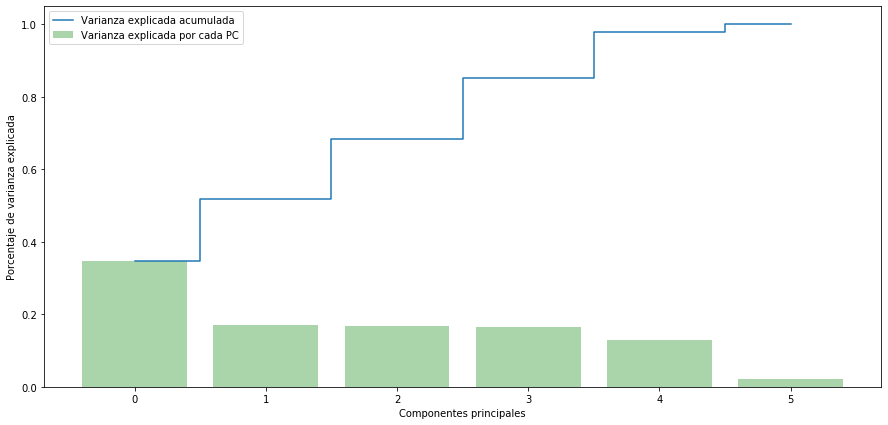

In [713]:
plt.figure(figsize=(15, 7))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='Varianza explicada por cada PC', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='Varianza explicada acumulada')
plt.ylabel('Porcentaje de varianza explicada')
plt.xlabel('Componentes principales')
plt.legend(loc='best')
plt.show()

In [745]:
pca.explained_variance_ratio_

array([0.34791838, 0.17014822, 0.16699145, 0.16604616, 0.12830952,
       0.02058627])

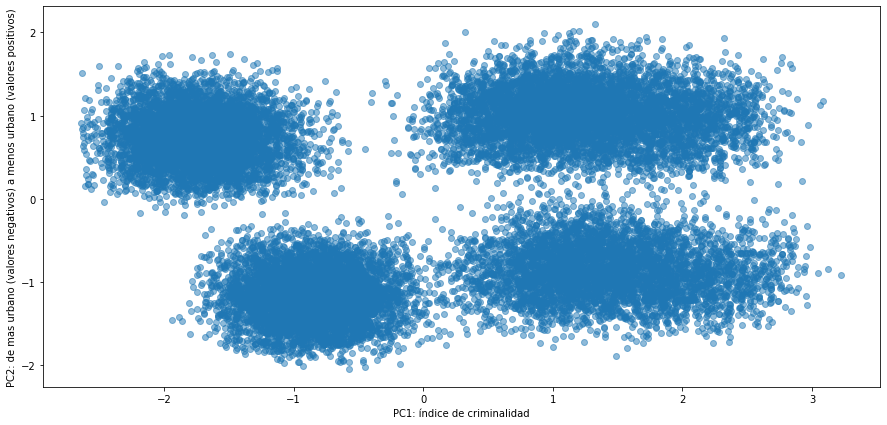

In [756]:
plt.figure(figsize=(15, 7))
plt.scatter(df_proyectado[:, 0], df_proyectado[:, 1], alpha=0.5)
plt.xlabel('PC1: índice de criminalidad')
plt.ylabel('PC2: de mas urbano (valores negativos) a menos urbano (valores positivos)')
for x,y,label in zip(df_proyectado[:, 0], df_proyectado[:, 1], df.index):
    plt.annotate(None,
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

In [757]:
def biplot(data, loadings, index1, index2, labels=None):
    plt.figure(figsize=(15, 7))
    xs = data[:,index1]
    ys = data[:,index2]
    n=loadings.shape[0]
    scalex = 1.0/(xs.max()- xs.min())
    scaley = 1.0/(ys.max()- ys.min())
    plt.scatter(xs*scalex,ys*scaley)
    for i in range(n):
        plt.arrow(0, 0, loadings[i,index1], loadings[i,index2],color='r',alpha=0.5)
        if labels is None:
            plt.text(loadings[i,index1]* 1.15, loadings[i,index2] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(loadings[i,index1]* 1.15, loadings[i,index2] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(index1))
    plt.ylabel("PC{}".format(index2))
    plt.grid()

In [758]:
def biplot(data, loadings, index1, index2, labels=None, point_labels=None):
    plt.figure(figsize=(15, 7))
    xs = data[:,index1]
    ys = data[:,index2]
    n=loadings.shape[0]
    scalex = 1.0/(xs.max()- xs.min())
    scaley = 1.0/(ys.max()- ys.min())
    plt.scatter(xs*scalex,ys*scaley)
    for i in range(n):
        plt.arrow(0, 0, loadings[i,index1]*.8, loadings[i,index2]*.8,color='r',alpha=0.5)
        if labels is None:
            plt.text(loadings[i,index1]*.85, loadings[i,index2]*.85, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(loadings[i,index1]*.85, loadings[i,index2]*.85, labels[i], color='g', ha='center', va='center')
    for x,y,label in zip(xs*scalex, ys*scaley, point_labels):
        plt.annotate(None,
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(index1+1))
    plt.ylabel("PC{}".format(index2+1))
    plt.grid() 

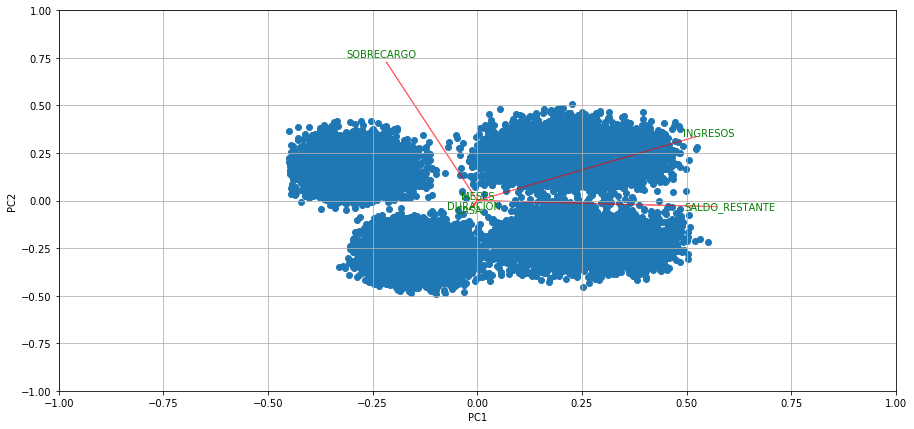

In [759]:
biplot(df_proyectado, pca.components_, 0, 1, data.columns, data.index)

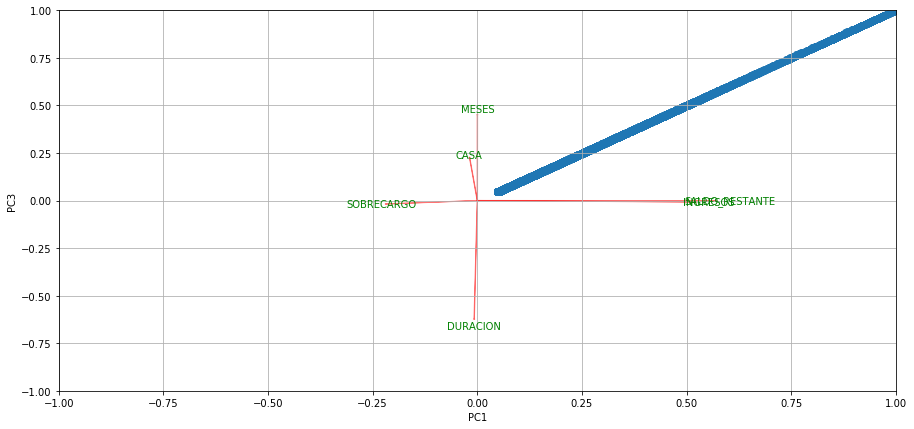

In [760]:
biplot(dataPca, pca.components_, 0, 2, data.columns, data.index)

# Los 3 componentes principales mas importantes

PC1: 34,8% 

PC2: 17,0% 

PC3: 16,7%

Con estos 3 componentes principales representamos el 68,5% de los datos

## CLUSTERS K-MEANS

### Interpretacion con K=3

In [679]:
kmeans = KMeans(n_clusters=3, random_state=1234, n_init=10)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

In [680]:
print("Le tomó a KMeans", kmeans.n_iter_, "iteraciones llegar a convergencia, con un WSS final de:",
      kmeans.inertia_, "y los centroides siguientes:", kmeans.cluster_centers_)

Le tomó a KMeans 10 iteraciones llegar a convergencia, con un WSS final de: 4.770902092243867e+20 y los centroides siguientes: [[4.05471493e+06 2.95523454e+08 2.39029851e+01 1.07245558e+01
  1.07574748e+02 3.67863658e+01]
 [7.02561495e+06 1.58506700e+09 2.39297521e+01 9.86815230e+00
  1.08694011e+02 6.64316411e+01]
 [4.49234979e+06 7.61275129e+08 2.37615916e+01 8.25757974e+00
  1.07549336e+02 3.72327853e+01]]


In [681]:
clusters = kmeans.predict(data)
clusters

array([2, 0, 2, ..., 0, 0, 0])

In [682]:
counter=Counter(clusters)
print(counter)

Counter({2: 9123, 0: 8442, 1: 3388})


In [683]:
data.columns

Index(['INGRESOS', 'CASA', 'MESES', 'DURACION', 'SOBRECARGO',
       'SALDO_RESTANTE'],
      dtype='object')

In [684]:
var_num = ['ESTADO', 'INGRESOS', 'CASA', 'PRECIO_DISPOSITIVO', 'MESES', 'DURACION','SOBRECARGO','SALDO_RESTANTE','SATISFACCION']

NameError: name 'dataStd' is not defined

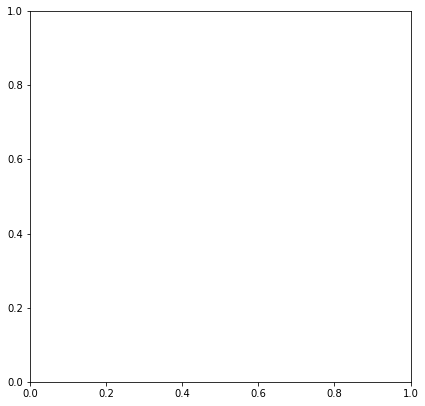

In [685]:
fig = plt.figure(figsize=(15,10))
colorPalette = ["r", "b", "g"]
ax = fig.add_subplot(2, 2, 1)
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=dataPca, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("PC1 vs. PC2")
ax = fig.add_subplot(2, 2, 2)
sns.scatterplot(x="PC1", y="PC3", hue="Cluster", data=dataPca, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("PC1 vs. PC3")
ax = fig.add_subplot(2, 2, 3)
sns.scatterplot(x="PC2", y="PC3", hue="Cluster", data=dataPca, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("PC2 vs. PC3")
plt.show()

### Interpretacion con K=4

In [686]:
kmeans = KMeans(n_clusters=4, random_state=1234, n_init=10)
kmeans.fit(df_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

In [687]:
print("Le tomó a KMeans", kmeans.n_iter_, "iteraciones llegar a convergencia, con un WSS final de:",
      kmeans.inertia_, "y los centroides siguientes:", kmeans.cluster_centers_)

Le tomó a KMeans 20 iteraciones llegar a convergencia, con un WSS final de: 63294.44708095102 y los centroides siguientes: [[-1.33186741e+00 -5.13296616e-01  1.01320009e-02  9.18669493e-01
  -5.27632199e-03 -9.02384834e-01]
 [ 9.52557879e-01 -3.91830616e-01 -8.59205262e-03  5.88930745e-02
  -5.18257865e-03  9.32649164e-01]
 [-4.72874566e-01 -1.79148835e-01  1.10056496e-03 -1.06790346e+00
   3.35776903e-03 -8.83394018e-01]
 [ 9.34331116e-01  1.84137977e+00 -6.98555428e-04  6.13537259e-02
   1.33288519e-02  9.21758459e-01]]


In [688]:
clusters = kmeans.predict(df_std)
clusters

array([2, 1, 1, ..., 1, 0, 1])

In [689]:
counter=Counter(clusters)
print(counter)

Counter({1: 6798, 0: 5434, 2: 5249, 3: 3472})


In [690]:
data.columns

Index(['INGRESOS', 'CASA', 'MESES', 'DURACION', 'SOBRECARGO',
       'SALDO_RESTANTE'],
      dtype='object')

In [691]:
var_num = ['ESTADO', 'INGRESOS', 'CASA', 'PRECIO_DISPOSITIVO', 'MESES', 'DURACION','SOBRECARGO','SALDO_RESTANTE','SATISFACCION']

AttributeError: 'DataFrame' object has no attribute 'Cluster'

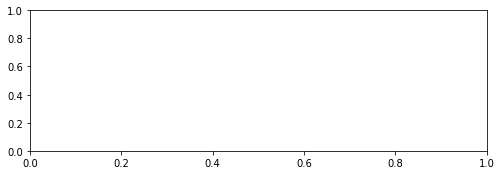

In [694]:
fig = plt.figure(figsize=(18,15))
i=1
for var in var_num:
    ax = fig.add_subplot(math.ceil(len(var_num)/2), 2, i)
    sns.kdeplot(data.loc[data.Cluster==0][var], shade=True, color='r', ax=ax);
    sns.kdeplot(data.loc[data.Cluster==1][var], shade=True, color='g', ax=ax);
    sns.kdeplot(data.loc[data.Cluster==2][var], shade=True, color='b', ax=ax);
    sns.kdeplot(data.loc[data.Cluster==3][var], shade=True, color='y', ax=ax);
    plt.title(var)
    plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2','Cluster 3'])
    i+=1

### Interpretacion con K=5

In [695]:
kmeans = KMeans(n_clusters=5, random_state=1234, n_init=10)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

In [696]:
print("Le tomó a KMeans", kmeans.n_iter_, "iteraciones llegar a convergencia, con un WSS final de:",
      kmeans.inertia_, "y los centroides siguientes:", kmeans.cluster_centers_)

Le tomó a KMeans 7 iteraciones llegar a convergencia, con un WSS final de: 1.8466880659100667e+20 y los centroides siguientes: [[3.73927722e+06 1.81481381e+08 2.39706613e+01 1.12289551e+01
  1.07105573e+02 3.51488152e+01]
 [4.68772423e+06 9.88112451e+08 2.40645619e+01 8.33969493e+00
  1.07600208e+02 3.88780064e+01]
 [7.19305955e+06 1.61337966e+09 2.38147912e+01 9.91189034e+00
  1.08689114e+02 6.81994581e+01]
 [4.41701911e+06 7.06929107e+08 2.36731226e+01 8.06510141e+00
  1.08233113e+02 3.64208843e+01]
 [4.41664807e+06 4.49695857e+08 2.38205380e+01 9.97543687e+00
  1.07274017e+02 3.86178873e+01]]


In [697]:
clusters = kmeans.predict(data)
clusters

array([1, 0, 3, ..., 4, 0, 4])

In [698]:
counter=Counter(clusters)
print(counter)

Counter({3: 5460, 4: 5093, 0: 4431, 2: 3139, 1: 2830})


In [699]:
data.columns

Index(['INGRESOS', 'CASA', 'MESES', 'DURACION', 'SOBRECARGO',
       'SALDO_RESTANTE'],
      dtype='object')

In [700]:
var_num = ['ESTADO', 'INGRESOS', 'CASA', 'PRECIO_DISPOSITIVO', 'MESES', 'DURACION','SOBRECARGO','SALDO_RESTANTE','SATISFACCION']

AttributeError: 'DataFrame' object has no attribute 'Cluster'

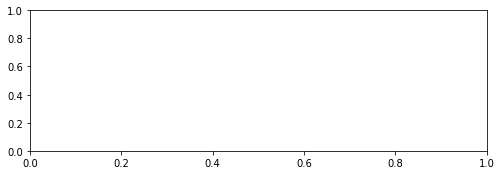

In [701]:
fig = plt.figure(figsize=(18,15))
i=1
for var in var_num:
    ax = fig.add_subplot(math.ceil(len(var_num)/2), 2, i)
    sns.kdeplot(data.loc[data.Cluster==0][var], shade=True, color='r', ax=ax);
    sns.kdeplot(data.loc[data.Cluster==1][var], shade=True, color='g', ax=ax);
    sns.kdeplot(data.loc[data.Cluster==2][var], shade=True, color='b', ax=ax);
    sns.kdeplot(data.loc[data.Cluster==3][var], shade=True, color='y', ax=ax);
    sns.kdeplot(data.loc[data.Cluster==4][var], shade=True, color='o', ax=ax);
    plt.title(var)
    plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2','Cluster 3','Cluster 4'])
    i+=1